In [457]:
import numpy as np
import pandas as pd
from termcolor import colored 
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from termcolor import colored 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



In [458]:
dfMusteriVerisi = pd.read_csv("data/musteri_verisi_5000_utf8.csv")
dfMusteriVerisi.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70
2,3902,Candeniz,Erkek,61,Konya,867.20
3,2080,Gözel,Erkek,64,Adana,2020.97
4,7901,Erdogan,Kadın,63,İstanbul,4334.16


In [459]:
dfSatisVerisi = pd.read_csv("data/satis_verisi_50002.csv", index_col=0)
dfSatisVerisi.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724


# Görev 1: Veri Temizleme ve Manipülasyonu (%25)

Genel Bilgilere Bakma ve Casting


In [460]:
#Bu fonskiyon dataframe hakkında bazı bilgileri ve eksik veri sayısını döndürmekte
def getBasicInformationOfDataframe(dataframe):

    print(colored("First 5 Data ","blue"))
    print(dataframe.head())

    print(colored("Data Info ","blue"))
    print(dataframe.info())

    print(colored("Data Describe ","blue"))
    print(dataframe.describe())

    nullValueCount = dataframe.isnull().any(axis=1).sum()
    print(colored(f"Null Value Count {nullValueCount}", "red" if nullValueCount else "green"))



In [461]:
musteriVerisiNullCount=dfMusteriVerisi.isnull().any(axis=1).sum()
getBasicInformationOfDataframe(dfMusteriVerisi)

First 5 Data 
   musteri_id      isim cinsiyet  yas      sehir  harcama_miktari
0        4353  Gülşahin    Kadın   57  Gaziantep          2726.01
1        8374  Yahşikan    Erkek   66  Gaziantep          4754.70
2        3902  Candeniz    Erkek   61      Konya           867.20
3        2080     Gözel    Erkek   64      Adana          2020.97
4        7901   Erdogan    Kadın   63   İstanbul          4334.16
Data Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB
None
Data Describe 
        musteri_id   

In [462]:
getBasicInformationOfDataframe(dfSatisVerisi)

First 5 Data 
        tarih ürün_kodu    ürün_adi    kategori    fiyat  adet  \
0  2023-07-02      P032       Mouse  Elektronik   1207.3    13   
1  2024-02-11      P011       Kalem   Kırtasiye   237.14    16   
2  2023-03-06      P024  Bilgisayar  Elektronik  1024.29     9   
3  2024-04-11      P063       Klima  Elektronik  1477.88     9   
4  2024-01-08      P063       Klima  Elektronik   949.43    19   

        toplam_satis  musteri_id  
0            15694.9        9225  
1            3794.24        3955  
2            9218.61        2367  
3  13300920000000000        2869  
4           18039.17        9724  
Data Info 
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tarih         5000 non-null   object
 1   ürün_kodu     5000 non-null   object
 2   ürün_adi      5000 non-null   object
 3   kategori      5000 non-null   object
 4   fiyat     

In [463]:
#satıs verisindeki numaric olması gereken sutünlar obje tipinde type casting işlemi
# fiyat ,toplam satıs ve tarih için cast 
dfSatisVerisi["fiyat"] = pd.to_numeric(dfSatisVerisi["fiyat"],errors="coerce")
dfSatisVerisi["toplam_satis"] = pd.to_numeric(dfSatisVerisi["toplam_satis"],errors="coerce")
dfSatisVerisi["tarih"] = pd.to_datetime(dfSatisVerisi["tarih"], format="%Y-%m-%d", errors="coerce")
dfSatisVerisi.dtypes

tarih           datetime64[ns]
ürün_kodu               object
ürün_adi                object
kategori                object
fiyat                  float64
adet                     int64
toplam_satis           float64
musteri_id               int64
dtype: object

In [464]:
#Casting işlemi sırasında oluşabilecek hatalardan dolayı satıs verimize nan değerler gelmiş olabilir
nullValueCount = dfSatisVerisi.isnull().any(axis=1).sum()
nullValueCount

42

Eksik değerlerin tespit etme ve giderme

In [465]:
nullColumns = dfSatisVerisi.columns[dfSatisVerisi.isnull().any()].tolist() #nan içeren sütünlar
nullColumns 

['fiyat', 'toplam_satis']

In [466]:
#EKSİK VERİLERE GÖZ ATALIM
nullRows=dfSatisVerisi[dfSatisVerisi.isnull().any(axis=1)].head()
nullRowsIndexs = nullRows.index
nullRows.head(3)


,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
159,2023-10-23,P018,Telefon,Elektronik,NaN,5,55.35,3111
195,2023-05-18,P063,Klima,Elektronik,NaN,13,95.55,6741
217,2023-03-23,P018,Telefon,Elektronik,NaN,13,102.57,6298


In [467]:
#2 sütünümüz numeric olduğu için imputer kullanarak nan değerleri giderelim
'''
imputer = KNNImputer(n_neighbors=5)
dfSatisVerisi[nullColumns] = imputer.fit_transform(dfSatisVerisi[nullColumns])
dfSatisVerisi.isnull().any(axis=1).sum()
'''
#imputer kötü performans sergilediği için farklı yöntemlerle doldurdum.

'\nimputer = KNNImputer(n_neighbors=5)\ndfSatisVerisi[nullColumns] = imputer.fit_transform(dfSatisVerisi[nullColumns])\ndfSatisVerisi.isnull().any(axis=1).sum()\n'

In [468]:
#fiyat verisini aynı kategorinin ortalamsına göre doldurmak daha mantıklı
avaragePriceDf = dfSatisVerisi.groupby("ürün_kodu").agg({"fiyat":"mean"}).reset_index()


In [469]:
dfSatisVerisi['fiyat'] = dfSatisVerisi.apply(
    lambda row: avaragePriceDf.loc[avaragePriceDf["ürün_kodu"]==row['ürün_kodu'],"fiyat"].iloc[0] if pd.isna(row['fiyat']) else row['fiyat'], axis=1
)

In [470]:
#toplam_satis null değerleri doldurmak için ise fiyat*adet i kullanabiliriz
dfSatisVerisi['toplam_satis'] = dfSatisVerisi.apply(
    lambda row: row["adet"] * row["fiyat"] if pd.isna(row['toplam_satis']) else row['toplam_satis'], axis=1
)

In [471]:
#Nan valuelar giderilmiş
dfSatisVerisi.loc[nullRowsIndexs].head(3)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
159,2023-10-23,P018,Telefon,Elektronik,754.775731,5,55.35,3111
195,2023-05-18,P063,Klima,Elektronik,727.629959,13,95.55,6741
217,2023-03-23,P018,Telefon,Elektronik,754.775731,13,102.57,6298


In [472]:
#Tekrar null value sayısına bakalım ve kendimizi doğrulayalım
dfSatisVerisi.isnull().any(axis=1).sum()

0

In [473]:
del nullRowsIndexs,nullRows, nullColumns,avaragePriceDf

AYKIRI DEĞERLEİN İNCELENMESİ VE BASKILANMASI

In [474]:
def dropOutlires(df,column,minQuantile=0.001,maxQuantile=0.999):

    rowNum,_ = df.shape
    minQ,maxQ=df[column].quantile([minQuantile,maxQuantile])
    outlire = df[(df[column]>maxQ) | (df[column]<minQ)]
    df2 =df[(df[column]>=minQ) & (df[column]<=maxQ)]
    newRowNum ,_=df2.shape
    print(colored(f"For column {column} dropped {rowNum-newRowNum} rows!","red"))
    
    return df2,outlire


In [475]:
def getOutliresWithPercentile (df,column):

    Q1,median,Q3= df[column].quantile([0.25,0.5,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlire = df[(df[column]>upper_bound) | (df[column]<lower_bound)]
    print(colored(f"1. Çeyrek (Q1): {Q1} \n3. Çeyrek (Q3) {Q3} \nLowerBound {lower_bound} \nUpperBound {upper_bound}","green"))
    print(colored(f"For column {column} outlire  {outlire.shape[0]} rows!","red"))
    
    
    return outlire


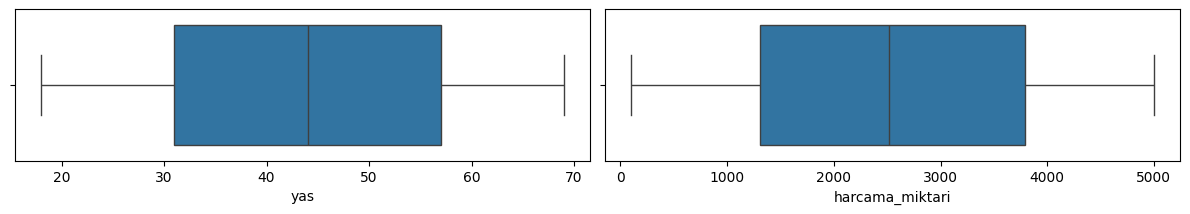

In [476]:
#Müşteri verisindeki yaş ve harcama miktarı nitelikleri için boxPlot cizimi
numericalColumns = ["yas","harcama_miktari"]
fig = plt.figure(figsize=(12,6))
for index,columnName in enumerate(numericalColumns):
    fig.tight_layout()
    grid = "32{}".format(index+1)
    ax = fig.add_subplot(int(grid))
    sns.boxplot(data=dfMusteriVerisi,x=columnName,ax=ax)

In [477]:
#Yas ve harcamaMiktraı nitelikleri için aykırı değer infosuna bakalım
getOutliresWithPercentile(dfMusteriVerisi,"harcama_miktari")
getOutliresWithPercentile(dfMusteriVerisi,"yas")


1. Çeyrek (Q1): 1313.1475 
3. Çeyrek (Q3) 3793.5225 
LowerBound -2407.415 
UpperBound 7514.085
For column harcama_miktari outlire  0 rows!
1. Çeyrek (Q1): 31.0 
3. Çeyrek (Q3) 57.0 
LowerBound -8.0 
UpperBound 96.0
For column yas outlire  0 rows!


,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari


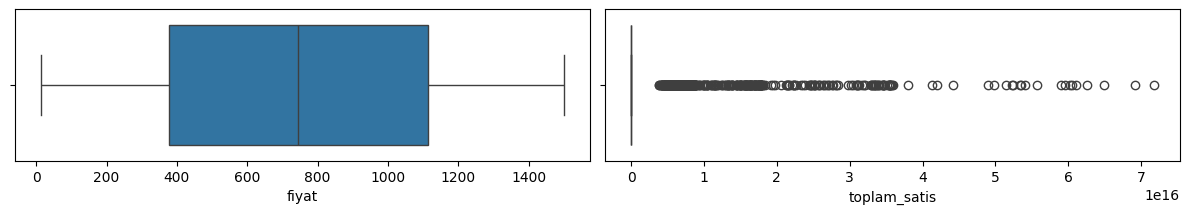

In [478]:
#Harcama verisindeki fiyat ve toplam_satis nitelikleri için boxPlot cizimi
numericalColumns = ["fiyat","toplam_satis"]
fig = plt.figure(figsize=(12,6))
for index,columnName in enumerate(numericalColumns):
    fig.tight_layout()
    grid = "32{}".format(index+1)
    ax = fig.add_subplot(int(grid))
    sns.boxplot(data=dfSatisVerisi,x=columnName,ax=ax)

In [479]:
getOutliresWithPercentile(dfSatisVerisi,"fiyat")


1. Çeyrek (Q1): 376.28 
3. Çeyrek (Q3) 1115.065 
LowerBound -731.8975000000003 
UpperBound 2223.2425000000003
For column fiyat outlire  0 rows!


,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id


In [480]:
toplamSatısOutlires=getOutliresWithPercentile(dfSatisVerisi,"toplam_satis")
toplamSatısOutlires.head(3)

1. Çeyrek (Q1): 2280.52 
3. Çeyrek (Q3) 14084.712500000001 
LowerBound -15425.76875 
UpperBound 31791.00125
For column toplam_satis outlire  467 rows!


,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,1.330092e+16,2869
15,2024-06-08,P082,Defter,Kırtasiye,1221.37,6,7.328220e+15,4666
27,2024-03-31,P082,Defter,Kırtasiye,420.90,3,1.262700e+16,7110


In [481]:
# 471 satırı droplamak veri setimizin yüzde 10 unu kaybetmemize yol açacak
#bu yüzden fiyat*adet ile baskılamak daha mantıklı olacak
dfSatisVerisi.loc[toplamSatısOutlires.index,"toplam_satis"] = dfSatisVerisi.loc[toplamSatısOutlires.index,"fiyat"]*dfSatisVerisi.loc[toplamSatısOutlires.index,"adet"]

#tekrardan göz atalım
dfSatisVerisi.loc[toplamSatısOutlires.index].head(3)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300.92,2869
15,2024-06-08,P082,Defter,Kırtasiye,1221.37,6,7328.22,4666
27,2024-03-31,P082,Defter,Kırtasiye,420.90,3,1262.70,7110


In [482]:
#ID ÜZERİNDEN 2 DATAFRAMİ BİRLEŞTİRME İŞLEMİ
bigData = pd.merge(dfMusteriVerisi, dfSatisVerisi, on='musteri_id', how='inner')
bigData.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,3902,Candeniz,Erkek,61,Konya,867.20,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54
1,3902,Candeniz,Erkek,61,Konya,867.20,2024-06-06,P087,Kulaklık,Elektronik,508.58,6,3051.48
2,2080,Gözel,Erkek,64,Adana,2020.97,2023-03-24,P037,Fırın,Ev Aletleri,1454.80,5,7274.00
3,2080,Gözel,Erkek,64,Adana,2020.97,2023-12-07,P018,Telefon,Elektronik,369.09,4,1476.36
4,7901,Erdogan,Kadın,63,İstanbul,4334.16,2023-03-22,P024,Bilgisayar,Elektronik,913.23,3,2739.69


# Görev 2: Zaman Serisi Analizi 

In [483]:
#Tarih verisinden gün ay yıl ve yılın kaçıncı haftasında olduğu bilgilerini çıkartıp yeni sütüna ekliyoruz
dfSatisVerisi2 = dfSatisVerisi.copy()
dfSatisVerisi2['hafta'] = dfSatisVerisi2['tarih'].dt.isocalendar().week
dfSatisVerisi2['gün'] = dfSatisVerisi2['tarih'].dt.day
dfSatisVerisi2['ay'] = dfSatisVerisi2['tarih'].dt.month
dfSatisVerisi2['yıl'] = dfSatisVerisi2['tarih'].dt.year

dfSatisVerisi2.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,hafta,gün,ay,yıl
0,2023-07-02,P032,Mouse,Elektronik,1207.30,13,15694.90,9225,26,2,7,2023
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955,6,11,2,2024
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367,10,6,3,2023
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300.92,2869,15,11,4,2024
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724,2,8,1,2024


## 1.	Satış verisi üzerinde haftalık ve aylık bazda toplam satış ve ürün satış trendlerini analiz edin

### Haftalık

In [484]:
#HAFTALIK
haftalıkToplamSatıs = dfSatisVerisi2.groupby(["yıl","hafta"]).agg({"toplam_satis":"sum"}).reset_index()
haftalıkToplamSatıs.head()

,yıl,hafta,toplam_satis
0,2022,44,22763.970000
1,2022,45,283830.070000
2,2022,46,345246.158387
3,2022,47,330719.366420
4,2022,48,377958.550000


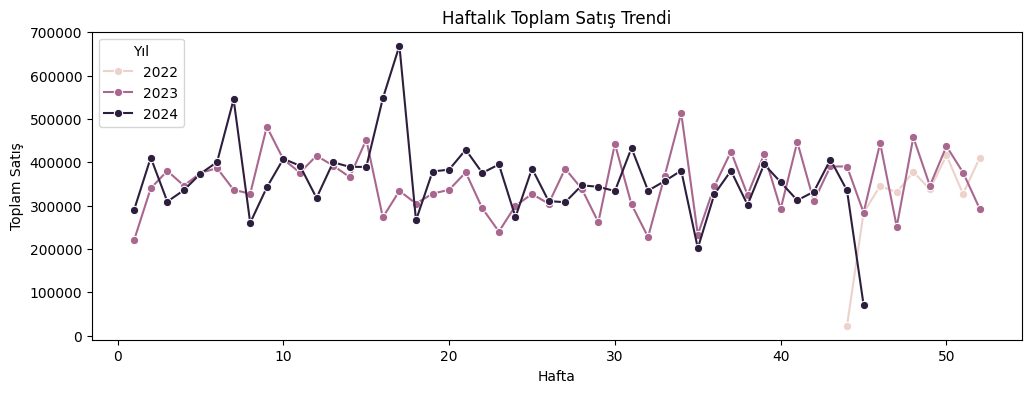

In [485]:
# Haftalık Toplam Satış Trendi Görseli
plt.figure(figsize=(12, 4))
sns.lineplot(data=haftalıkToplamSatıs, x=haftalıkToplamSatıs['hafta'], 
             y="toplam_satis", hue=haftalıkToplamSatıs["yıl"], marker='o')

plt.title("Haftalık Toplam Satış Trendi")
plt.xlabel("Hafta")
plt.ylabel("Toplam Satış")
plt.legend(title="Yıl", loc="upper left")
plt.show()


In [486]:
# haftalık ürün satıs trendi
haftalikUrünSatis = dfSatisVerisi2.groupby(['yıl', 'hafta', 'ürün_adi']).agg({'adet': 'sum'}).reset_index()
haftalikUrünSatis.head(3)

,yıl,hafta,ürün_adi,adet
0,2022,44,Bilgisayar,12
1,2022,44,Kalem,18
2,2022,44,Çanta,27


In [487]:
#HER ÜRÜN İÇİN ÜRÜNÜN HAFTALIK SATIS ADETİ TRENDİ
urunler = haftalikUrünSatis['ürün_adi'].unique()
for urun in urunler:
    
    aaa=haftalikUrünSatis.loc[haftalikUrünSatis["ürün_adi"] == urun]
    fig = px.bar(aaa, x='hafta', y='adet', color='yıl', barmode='group', title=f"Haftalık Bazda {urun} Satış Adetleri")
    fig.update_layout(
        width=800,   
        height=400    
    )
    
    fig.show()

### aylık

In [488]:
#AYLIK
aylıkToplamSatis = dfSatisVerisi2.groupby(["yıl","ay"]).agg({"toplam_satis":"sum"})
aylıkToplamSatis.head(3)

toplam_satis
yıl  ay              
2022 11  1.132052e+06
     12  1.719098e+06
2023 1   1.422855e+06

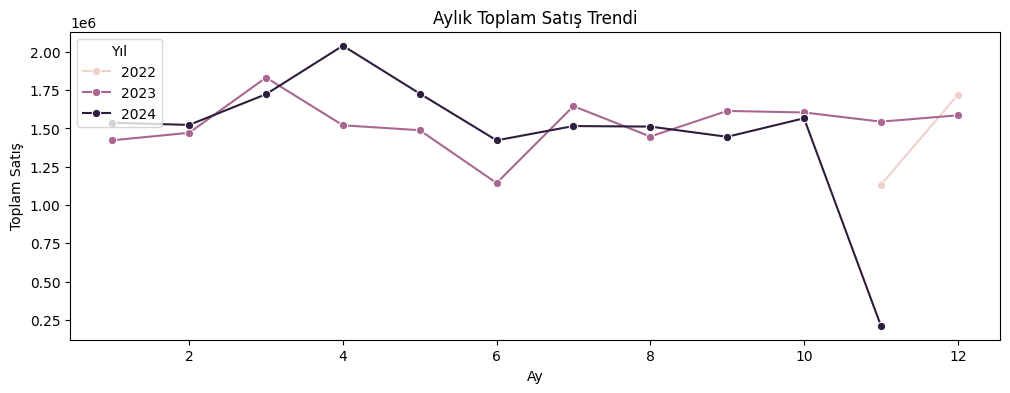

In [489]:
# Aylık Toplam Satış Trendi Görseli
plt.figure(figsize=(12, 4))
sns.lineplot(data=aylıkToplamSatis, x=aylıkToplamSatis.index.get_level_values('ay'), 
             y="toplam_satis", hue=aylıkToplamSatis.index.get_level_values('yıl'), marker='o')

plt.title("Aylık Toplam Satış Trendi")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış")
plt.legend(title="Yıl", loc="upper left")
plt.show()

In [490]:
# aylık ürün satıs trendi
aylıkUrünSatis = dfSatisVerisi2.groupby(['yıl', 'ay', 'ürün_adi']).agg({'adet': 'sum'}).reset_index()
aylıkUrünSatis.head(3)

,yıl,ay,ürün_adi,adet
0,2022,11,Bilgisayar,116
1,2022,11,Defter,211
2,2022,11,Fırın,140


In [491]:
# her ürün için aylık satıs adeti grafiği
urunler = aylıkUrünSatis['ürün_adi'].unique()
for urun in urunler:
    
    aaa=aylıkUrünSatis.loc[aylıkUrünSatis["ürün_adi"] == urun]
    fig = px.bar(aaa, x='ay', y='adet', color='yıl', barmode='group', title=f"Aylık Bazda {urun} Satış Adetleri")
    fig.update_layout(
        width=800,   
        height=400    
    )
    fig.show()

del aaa, urun,urunler,fig,aylıkUrünSatis,aylıkToplamSatis,haftalikUrünSatis,haftalıkToplamSatıs

## 2.	tarih sütununu kullanarak, her ayın ilk ve son satış günlerini bulun. Ayrıca, her hafta kaç ürün satıldığını hesaplayın.

In [492]:
minMaxDays=dfSatisVerisi2.groupby(["yıl","ay"]).agg({ "gün": ["min", "max"]}).reset_index()
minMaxDays = minMaxDays.droplevel(0,axis=1)
minMaxDays.columns = ["yıl","ay","min","max"]
minMaxDays.head()


,yıl,ay,min,max
0,2022,11,6,30
1,2022,12,1,31
2,2023,1,1,31
3,2023,2,1,28
4,2023,3,1,31


In [493]:
# yıl üzerinde dış döngü
# o yıla ait ayları filtrele
#yıl ay çiftlerinin min ve max değerlerini al ve yazdır
for yıl in minMaxDays["yıl"].unique():
    monthsOfYear = minMaxDays.loc[minMaxDays["yıl"]==yıl,"ay"].unique()
    for ay in monthsOfYear:
        min,max =minMaxDays.loc[(minMaxDays["yıl"]==yıl) & (minMaxDays["ay"]==ay),["min","max"]].values[0]
        print(f"{yıl}-{ay} başlangıc bitis {min}-{max}")

2022-11 başlangıc bitis 6-30
2022-12 başlangıc bitis 1-31
2023-1 başlangıc bitis 1-31
2023-2 başlangıc bitis 1-28
2023-3 başlangıc bitis 1-31
2023-4 başlangıc bitis 1-30
2023-5 başlangıc bitis 1-31
2023-6 başlangıc bitis 1-30
2023-7 başlangıc bitis 1-31
2023-8 başlangıc bitis 1-31
2023-9 başlangıc bitis 1-30
2023-10 başlangıc bitis 1-31
2023-11 başlangıc bitis 1-30
2023-12 başlangıc bitis 1-31
2024-1 başlangıc bitis 1-31
2024-2 başlangıc bitis 1-29
2024-3 başlangıc bitis 1-31
2024-4 başlangıc bitis 1-30
2024-5 başlangıc bitis 1-31
2024-6 başlangıc bitis 1-30
2024-7 başlangıc bitis 1-31
2024-8 başlangıc bitis 1-31
2024-9 başlangıc bitis 1-30
2024-10 başlangıc bitis 1-31
2024-11 başlangıc bitis 1-5


In [494]:
# yıl hafta çiftlerinde toplam satılmıs ürün sayısı
dfSatisVerisi2.groupby(['yıl', 'hafta']).agg({'adet': 'sum'}).reset_index()

,yıl,hafta,adet
0,2022,44,57
1,2022,45,428
2,2022,46,455
3,2022,47,459
4,2022,48,518
...,...,...,...
101,2024,41,522
102,2024,42,454
103,2024,43,641
104,2024,44,472


## 3.	Zaman serisindeki trendleri tespit etmek için grafikler çizdirin (örneğin: aylık satış artışı veya düşüşü).

In [495]:
dfSatisVerisi2 = dfSatisVerisi2.sort_values(by="tarih",ascending=True)
dfSatisVerisi2.head(3)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,hafta,gün,ay,yıl
4677,2022-11-06,P010,Çanta,Giyim,597.15,15,8957.25,8736,44,6,11,2022
1847,2022-11-06,P011,Kalem,Kırtasiye,422.06,18,7597.08,7762,44,6,11,2022
543,2022-11-06,P024,Bilgisayar,Elektronik,444.37,12,5332.44,1731,44,6,11,2022


In [496]:
def viz(df,x,y,tittle,xlabel,ylabel):
    plt.figure(figsize=(9, 3))
    sns.lineplot(data=df, x=x, 
                y=y, marker='o')

    plt.title(tittle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [497]:
tarihToplamSatıs = dfSatisVerisi2.groupby("tarih").agg({"toplam_satis":"sum"}).reset_index()
tarihToplamSatıs.head(3)

,tarih,toplam_satis
0,2022-11-06,22763.97
1,2022-11-07,38559.52
2,2022-11-08,28615.71


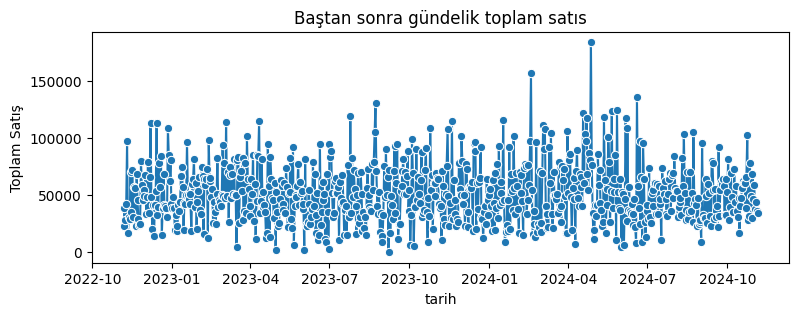

In [498]:
viz(tarihToplamSatıs,"tarih","toplam_satis","Baştan sonra gündelik toplam satıs","tarih","Toplam Satış")


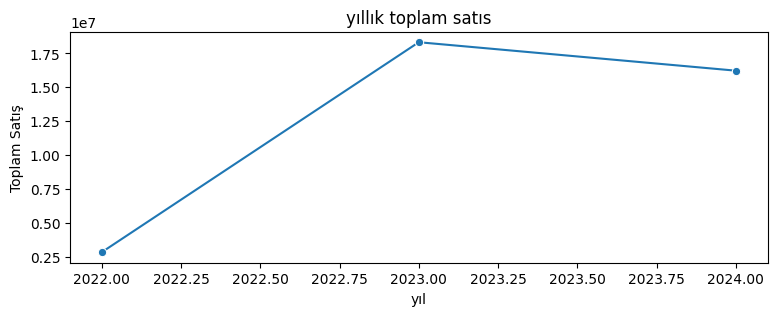

In [499]:
yıllıkToplamSatıs = dfSatisVerisi2.groupby("yıl").agg({"toplam_satis":"sum"}).reset_index()

viz(yıllıkToplamSatıs,"yıl","toplam_satis","yıllık toplam satıs","yıl","Toplam Satış")

# Görev 3: Kategorisel ve Sayısal Analiz (%25)

## 1.	Ürün kategorilerine göre toplam satış miktarını ve her kategorinin tüm satışlar içindeki oranını hesaplayın.

In [500]:
#Tüm satışların toplamının hesaplanması
toplamSatıs = dfSatisVerisi2["toplam_satis"].sum()
print(toplamSatıs)

#Kategorilere göre toplam satışların toplanması
kategoriToplamSatıs = dfSatisVerisi2.groupby("kategori").agg({"toplam_satis":"sum"}).reset_index()

#Kategorinin toplam satısının toplam satısa oranının hesaplanması 100 delik
kategoriToplamSatıs["toplam_satıs_oranı"] = kategoriToplamSatıs["toplam_satis"]/toplamSatıs*100
kategoriToplamSatıs

37404414.090525724


,kategori,toplam_satis,toplam_satıs_oranı
0,Elektronik,1.815090e+07,48.526093
1,Ev Aletleri,3.791499e+06,10.136501
2,Giyim,3.884421e+06,10.384926
3,Kırtasiye,7.816100e+06,20.896197
4,Mutfak Ürünleri,3.761494e+06,10.056283


## 2.	Müşterilerin yaş gruplarına göre satış eğilimlerini analiz edin. (Örnek yaş grupları: 18-25, 26-35, 36-50, 50+)

In [501]:
#yaş grupları ve aralığa verilecek labelların belirlenmesi
yasGrupları = [18, 25, 35, 50,bigData["yas"].max()+1]
labels = [0,1,2,3]  
#yeni sutuna yaş grubunun açılması 
bigData["yas_grup"] = pd.cut(bigData["yas"], bins=yasGrupları, labels=labels, right=False)
bigData.sample(3)


,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,yas_grup
3670,7793,Satıa,Erkek,56,Adana,766.76,2024-01-09,P018,Telefon,Elektronik,462.68,18,8328.24,3
1359,6431,Şehreban,Kadın,35,Konya,2698.73,2023-07-25,P063,Klima,Elektronik,616.88,8,4935.04,2
427,6967,Sümeyye,Erkek,61,Ankara,1139.03,2023-11-27,P082,Defter,Kırtasiye,728.85,8,5830.80,3


In [502]:
#Yaş gruplarına göre gruplandırma. Toplam satısı, satıs adeti, en çok ilgilendiği kategori, bu gruptaki kişilerin ağırlıklı cinsiyeti
gruopByAge = bigData.groupby("yas_grup",observed=True).agg({"toplam_satis":"sum",
                                                            "adet":"sum",
                                                            "kategori":pd.Series.mode,
                                                            "cinsiyet":pd.Series.mode}).reset_index()
#ayrıca bu grup toplam satısların yüzde kaçını oluşturuyor
gruopByAge["ratio"] = gruopByAge["toplam_satis"] / toplamSatıs*100
gruopByAge

,yas_grup,toplam_satis,adet,kategori,cinsiyet,ratio
0,0,5.372151e+06,6941,Elektronik,Erkek,14.362346
1,1,6.800043e+06,9436,Elektronik,Kadın,18.179788
2,2,1.115483e+07,14988,Elektronik,Kadın,29.822217
3,3,1.407739e+07,18994,Elektronik,Erkek,37.635649


In [503]:
for index,row in gruopByAge.iterrows():
    ageGroup = row["yas_grup"]
    llimit = labels.index(ageGroup)
    print(f"Yaş grubu {ageGroup} --> {yasGrupları[llimit]} - {yasGrupları[llimit+1]}")
    print(f'Toplam satıs: {row["toplam_satis"]}  oran: {row["ratio"]:.3f}')
    print(f'Ağırlıklı olarak cinsiyet: {row["cinsiyet"]}  ve satış kategorisi: {row["kategori"]} \n')

Yaş grubu 0 --> 18 - 25
Toplam satıs: 5372151.398940559  oran: 14.362
Ağırlıklı olarak cinsiyet: Erkek  ve satış kategorisi: Elektronik 

Yaş grubu 1 --> 25 - 35
Toplam satıs: 6800043.144566474  oran: 18.180
Ağırlıklı olarak cinsiyet: Kadın  ve satış kategorisi: Elektronik 

Yaş grubu 2 --> 35 - 50
Toplam satıs: 11154825.627792403  oran: 29.822
Ağırlıklı olarak cinsiyet: Kadın  ve satış kategorisi: Elektronik 

Yaş grubu 3 --> 50 - 70
Toplam satıs: 14077393.91922629  oran: 37.636
Ağırlıklı olarak cinsiyet: Erkek  ve satış kategorisi: Elektronik 



## 3.	Kadın ve erkek müşterilerin harcama miktarlarını karşılaştırın ve harcama davranışları arasındaki farkı tespit edin.

In [504]:
#ORTALAMA HARCAMA

#KADINLARIN ALDIGI EKEKLERİN ALDIĞI EN ÇOK ÜRÜN
mergedData =pd.merge(dfMusteriVerisi, dfSatisVerisi2, on='musteri_id', how='inner')
mergedData.head(2)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,hafta,gün,ay,yıl
0,3902,Candeniz,Erkek,61,Konya,867.2,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54,2,10,1,2024
1,3902,Candeniz,Erkek,61,Konya,867.2,2024-06-06,P087,Kulaklık,Elektronik,508.58,6,3051.48,23,6,6,2024


In [505]:
mergedData.groupby("cinsiyet").agg({"harcama_miktari":["mean","sum"]}).reset_index()
# kadınların harcama miktarı ortalama ve toplama göre erkeklerden daha fazla

cinsiyet harcama_miktari            
                      mean         sum
0    Erkek     2571.324411  6348599.97
1    Kadın     2610.126377  6606229.86

In [506]:
#harcama davranılşarı 2 başlıkta incele 1 MEVSİMLİK 2 KATEGORİK
#bir mevsim sütünü açıp ay'a göre mevsimi ekle
def season(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

mergedData["mevsim"] = mergedData["ay"].apply(lambda x : season(x))
mergedData.head(1)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,hafta,gün,ay,yıl,mevsim
0,3902,Candeniz,Erkek,61,Konya,867.2,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54,2,10,1,2024,Kış


                   harcama_miktari
cinsiyet mevsim                   
Erkek    Kış            1590170.61
         Sonbahar       1575880.31
         Yaz            1470460.33
         İlkbahar       1712088.72
Kadın    Kış            1569917.14


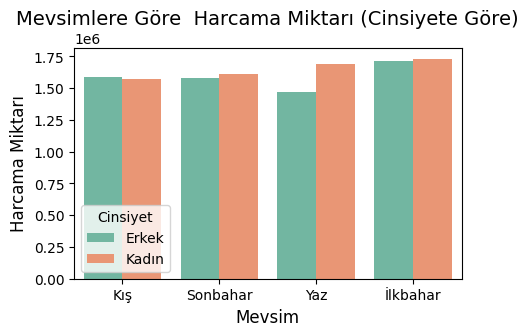

In [507]:
tempData =mergedData.groupby(["cinsiyet","mevsim"]).agg({"harcama_miktari": "sum"})
print(tempData.head())

plt.figure(figsize=(5, 3))
sns.barplot(x="mevsim", y="harcama_miktari", hue="cinsiyet", data=tempData, palette="Set2")
plt.title('Mevsimlere Göre  Harcama Miktarı (Cinsiyete Göre)', fontsize=14)
plt.xlabel('Mevsim', fontsize=12)
plt.ylabel('Harcama Miktarı', fontsize=12)
plt.legend(loc="lower left", title="Cinsiyet")
plt.show()
#mevsimlik olarak harcamada 2 grupta birbirine çok yakın  ancak yaz ayında kadınların harcaması erkeklerden net şekilde çok
del tempData

                          harcama_miktari   adet
cinsiyet kategori                               
Erkek    Elektronik            3041759.12  11777
         Ev Aletleri            594728.70   2220
         Giyim                  701147.29   2894
         Kırtasiye             1368681.18   5355
         Mutfak Ürünleri        642283.68   2654


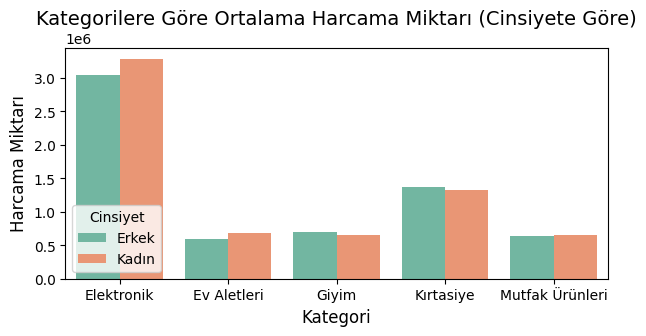

In [508]:
tempData =mergedData.groupby(["cinsiyet","kategori"]).agg({"harcama_miktari": "sum", "adet":"sum"})
print(tempData.head())

plt.figure(figsize=(7, 3))
sns.barplot(x="kategori", y="harcama_miktari", hue="cinsiyet", data=tempData, palette="Set2")
plt.title('Kategorilere Göre Ortalama Harcama Miktarı (Cinsiyete Göre)', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Harcama Miktarı', fontsize=12)
plt.legend(loc="lower left", title="Cinsiyet")
plt.show()

del tempData
# ev aletleri ve giyim harcininde diğer kategorilere kadınlar daha çok harcama yapmıstır 

#   Görev 4: İleri Düzey Veri Manipülasyonu (%25)


## 1.	Müşterilerin şehir bazında toplam harcama miktarını bulun ve şehirleri en çok harcama yapan müşterilere göre sıralayın

In [509]:
#Çoktan aza sıralama   azdan çoka için ascending=True
dfMusteriVerisi.groupby("sehir").agg({"harcama_miktari":"sum"}).sort_values(by="harcama_miktari", ascending=False).reset_index() #azdan --> çok'a 

,sehir,harcama_miktari
0,İzmir,1719480.53
1,Gaziantep,1680765.15
2,Ankara,1632071.24
3,Konya,1604023.46
4,Adana,1567156.27
5,İstanbul,1544511.23
6,Bursa,1543966.94
7,Antalya,1482820.25


## 2.	Satış verisinde her bir ürün için ortalama satış artışı oranı hesaplayın. Bu oranı hesaplamak için her bir üründe önceki aya göre satış değişim yüzdesini kullanın.

In [510]:
# Satış artış oranı satılan adet olarak baz alındı. Toplam satış miktarı için agg({"toplam_satıs":"sum"}) kullanılabilir

changeRateDf= dfSatisVerisi2.groupby(["ürün_adi","yıl","ay"]).agg({"adet":"sum"}).sort_index(ascending=True).reset_index()
changeRateDf


,ürün_adi,yıl,ay,adet
0,Bilgisayar,2022,11,116
1,Bilgisayar,2022,12,170
2,Bilgisayar,2023,1,216
3,Bilgisayar,2023,2,83
4,Bilgisayar,2023,3,285
...,...,...,...,...
245,Çanta,2024,7,181
246,Çanta,2024,8,250
247,Çanta,2024,9,273
248,Çanta,2024,10,228


In [511]:
#Burada gerçekleştirilen işlem ürün bazında gerçekleştirildi.
#ürüne ait veriler bir birim aşşağıya kaydırıldı ilk veri nan olarak atandı.
#böylece (şuanki - önceki)/önceki fonskiyonuna ulaşabilir olduk

for ürün_adi in changeRateDf["ürün_adi"].unique():
    changeRateDf.loc[changeRateDf["ürün_adi"]==ürün_adi,"değişimOranı"]= ((changeRateDf.loc[changeRateDf["ürün_adi"]==ürün_adi,"adet"]-
                                    changeRateDf.loc[changeRateDf["ürün_adi"]==ürün_adi,"adet"].shift(1))
                                   /changeRateDf.loc[changeRateDf["ürün_adi"]==ürün_adi,"adet"].shift(1))*100
changeRateDf.sample()
    

,ürün_adi,yıl,ay,adet,değişimOranı
214,Telefon,2024,1,274,46.524064


In [512]:
#Bilgisayar kategorisindeki ilk satıs 2022 11 ayda gerçekleşti öncesi olmadığı için Nan değere sahip
changeRateDf.head()


,ürün_adi,yıl,ay,adet,değişimOranı
0,Bilgisayar,2022,11,116,NaN
1,Bilgisayar,2022,12,170,46.551724
2,Bilgisayar,2023,1,216,27.058824
3,Bilgisayar,2023,2,83,-61.574074
4,Bilgisayar,2023,3,285,243.373494


In [513]:
#Aynı durum diğer ürünler içinde geçerli.
#Örneğin çanta kategorisi
changeRateDf.loc[changeRateDf["ürün_adi"]=="Çanta"].head(3)

,ürün_adi,yıl,ay,adet,değişimOranı
225,Çanta,2022,11,168,NaN
226,Çanta,2022,12,168,0.000000
227,Çanta,2023,1,261,55.357143


## 3.	Pandas groupby ile her bir kategorinin aylık toplam satışlarını hesaplayın ve değişim oranlarını grafikle gösterin.

In [514]:
changeRateCategoryDF = dfSatisVerisi2.groupby(["kategori","ay"]).agg({"toplam_satis":"sum"}).reset_index()

changeRateCategoryDF.head()

,kategori,ay,toplam_satis
0,Elektronik,1,1.580418e+06
1,Elektronik,2,1.330391e+06
2,Elektronik,3,1.818586e+06
3,Elektronik,4,1.683711e+06
4,Elektronik,5,1.552640e+06


In [515]:
#Burada gerçekleştirilen işlem kategori bazında gerçekleştirildi.
#ürüne ait veriler bir birim aşşağıya kaydırıldı ilk veri nan olarak atandı.
#böylece (şuankiToplamSatıs - öncekiToplamSAtıs)/öncekiToplamSatıs fonskiyonuna ulaşabilir olduk
for kategori in changeRateCategoryDF["kategori"].unique():
    changeRateCategoryDF.loc[changeRateCategoryDF["kategori"]==kategori,"değişimOranı"]= ((changeRateCategoryDF.loc[changeRateCategoryDF["kategori"]==kategori,"toplam_satis"]-
                                    changeRateCategoryDF.loc[changeRateCategoryDF["kategori"]==kategori,"toplam_satis"].shift(1))
                                   /changeRateCategoryDF.loc[changeRateCategoryDF["kategori"]==kategori,"toplam_satis"].shift(1))*100
changeRateCategoryDF.head()

,kategori,ay,toplam_satis,değişimOranı
0,Elektronik,1,1.580418e+06,NaN
1,Elektronik,2,1.330391e+06,-15.820269
2,Elektronik,3,1.818586e+06,36.695600
3,Elektronik,4,1.683711e+06,-7.416470
4,Elektronik,5,1.552640e+06,-7.784697


In [516]:
changeRateCategoryDF.loc[changeRateCategoryDF["kategori"]=="Mutfak Ürünleri"].head(3)

,kategori,ay,toplam_satis,değişimOranı
48,Mutfak Ürünleri,1,254605.16,NaN
49,Mutfak Ürünleri,2,362107.92,42.223323
50,Mutfak Ürünleri,3,324357.74,-10.425119


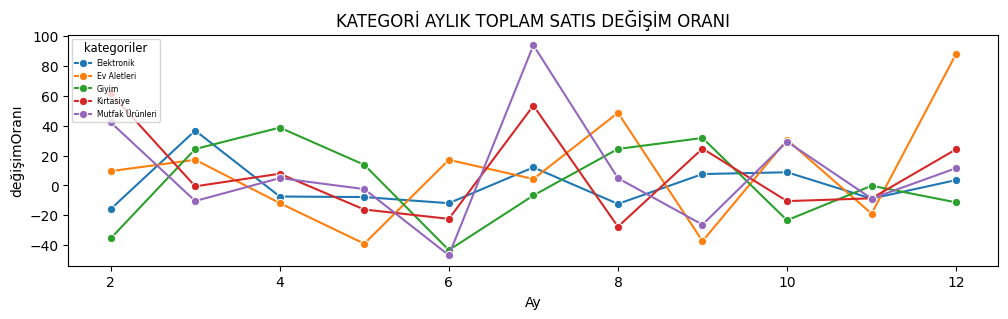

In [517]:

plt.figure(figsize=(12, 3))
sns.lineplot(data=changeRateCategoryDF, x="ay", 
             y="değişimOranı", hue='kategori', marker='o')

plt.title("KATEGORİ AYLIK TOPLAM SATIS DEĞİŞİM ORANI")
plt.xlabel("Ay")
plt.ylabel("değişimOranı")
plt.legend(title="kategoriler", loc='upper left',fontsize=5.5, title_fontsize="small" )
plt.show()


# Görev 5: Ekstra (BONUS)

## 1.Pareto Analizi: Satışların %80’ini oluşturan ürünleri belirleyin (80/20 kuralını uygulayın). Bu ürünleri grafikte gösterin.

In [518]:
#Kaynakça: https://www.kalderankara.org/bilgi-merkezi/yonetim-ve-kalite-araclari/pareto-analizi-7#:~:text=Pareto%20analizi%2C%20bir%20sorunun%20%C3%B6nemli,20%20analizi%20olarak%20da%20adland%C4%B1r%C4%B1l%C4%B1r.
# satılan adet baz alındı. Gruplandırma aşaması
paretoDf = dfSatisVerisi2.groupby(["ürün_adi"]).agg({"adet":"sum"}).reset_index()
totalSale = paretoDf["adet"].sum() #toplam satış sayısı
paretoDf

,ürün_adi,adet
0,Bilgisayar,4585
1,Defter,5202
2,Fırın,4833
3,Kalem,5300
4,Klima,4684
5,Kulaklık,4938
6,Mouse,5061
7,Su Şişesi,5259
8,Telefon,5244
9,Çanta,5253


In [519]:
# satış adetinin toplam satış adet sayısına oranı 100 de cinsinden
paretoDf["satısOranı"] = (paretoDf["adet"] / totalSale)*100

#sıralama artandan azalana
paretoDf=paretoDf.sort_values("satısOranı",ascending=0)
paretoDf


,ürün_adi,adet,satısOranı
3,Kalem,5300,10.524435
7,Su Şişesi,5259,10.443019
9,Çanta,5253,10.431105
8,Telefon,5244,10.413233
1,Defter,5202,10.329832
6,Mouse,5061,10.049842
5,Kulaklık,4938,9.805596
2,Fırın,4833,9.597093
4,Klima,4684,9.301217
0,Bilgisayar,4585,9.104629


In [520]:
# kümülatif toplamın belirlenmesi 
paretoDf['kümülatifSatışOranı'] = paretoDf['satısOranı'].cumsum()
paretoDf

,ürün_adi,adet,satısOranı,kümülatifSatışOranı
3,Kalem,5300,10.524435,10.524435
7,Su Şişesi,5259,10.443019,20.967454
9,Çanta,5253,10.431105,31.398558
8,Telefon,5244,10.413233,41.811791
1,Defter,5202,10.329832,52.141623
6,Mouse,5061,10.049842,62.191465
5,Kulaklık,4938,9.805596,71.997061
2,Fırın,4833,9.597093,81.594154
4,Klima,4684,9.301217,90.895371
0,Bilgisayar,4585,9.104629,100.000000


In [521]:
# 80 lik kısmı bulmak için filtreleme 80 den küçük verileri
paretoDf80=paretoDf.loc[paretoDf["kümülatifSatışOranı"]<80]
paretoDf80

,ürün_adi,adet,satısOranı,kümülatifSatışOranı
3,Kalem,5300,10.524435,10.524435
7,Su Şişesi,5259,10.443019,20.967454
9,Çanta,5253,10.431105,31.398558
8,Telefon,5244,10.413233,41.811791
1,Defter,5202,10.329832,52.141623
6,Mouse,5061,10.049842,62.191465
5,Kulaklık,4938,9.805596,71.997061


In [522]:
fig = px.bar(paretoDf80, x='ürün_adi', y='satısOranı', color='adet', title="Ürün Başına Satış Oranı")
fig.update_layout(
    width=800,   
    height=400    
)
fig.show()

## 2.	Cohort Analizi: Müşterilerin satın alım alışkanlıklarını analiz etmek için Pandas ile cohort analizi yapın. Örneğin, ilk kez satın alan müşterilerin tekrar alım oranlarını inceleyin.

In [523]:
cohortDf =pd.merge(dfMusteriVerisi, dfSatisVerisi, on='musteri_id', how='inner')
cohortDf.sample(1)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
82,1756,Berki,Kadın,44,Ankara,2751.49,2023-12-22,P087,Kulaklık,Elektronik,434.92,4,1739.68


## 3.	Tahmin Modeli: Aylık veya haftalık satış miktarlarını tahmin etmek için basit bir regresyon modeli (örneğin Linear Regression) uygulayın. sklearn kullanarak train/test split işlemi ile modeli eğitin ve modelin doğruluğunu ölçün.

aylık toplam satıs  ARIMA DENEMESİ


In [524]:
from pandas.tseries.offsets import MonthEnd
#Verileri grupladım. Daha sonra bu verinin ay sonu verisi olduğunu varsayımında bulundum ve tarih sütunu yeniden formatladım
# (yıl-ay-(yıl-ayın son günü)) şeklinde. Tarih sütününü index olarak atadım
data = dfSatisVerisi2.groupby(["yıl","ay"]).agg({"toplam_satis":"sum"}).reset_index()
data['tarih'] =pd.to_datetime(data['yıl'].astype(str) + '-' + data['ay'].astype(str) + '-01') + MonthEnd(0)
data.drop(columns=["yıl","ay"],inplace=True)
data.set_index('tarih', inplace=True)
data.head()

,toplam_satis
tarih,
2022-11-30,1.132052e+06
2022-12-31,1.719098e+06
2023-01-31,1.422855e+06
2023-02-28,1.471878e+06
2023-03-31,1.832711e+06


In [525]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

#elimizdeki veriyi 0.8 i train 0.2 si test olacak şekilde böldüm.
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

#ilgilendiğimiz nitelik toplam satış
train_arima = train_data['toplam_satis']
test_arima = test_data['toplam_satis']

#"toplam_satis" verilerini içeren bir liste.
history = [x for x in train_arima]

#Test setindeki "toplam_satis" değerleri
y = test_arima

predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

C:\Users\emrul\AppData\Local\Temp\ipykernel_17208\2172105403.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [526]:
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

C:\Users\emrul\AppData\Local\Temp\ipykernel_17208\1295931633.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [527]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 376602034394.4392
MAE: 333894.823281212
RMSE: 613679.0972441861


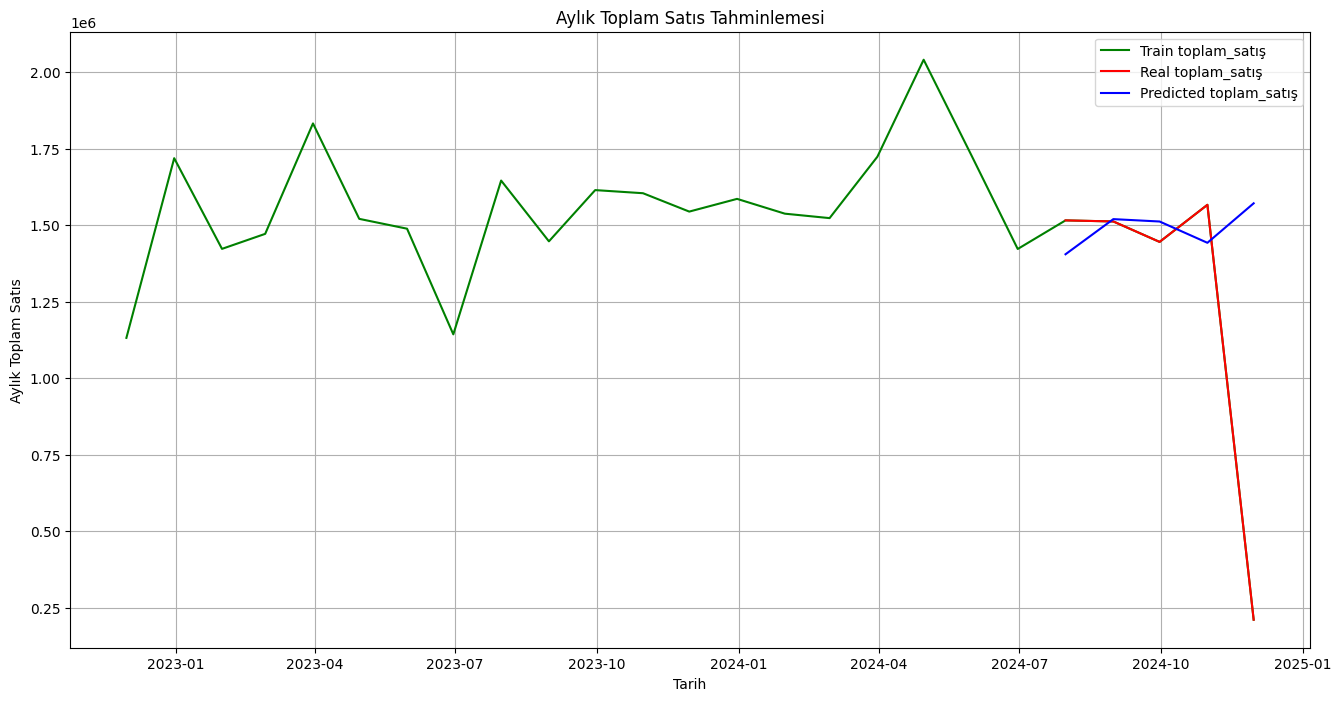

In [529]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data.index, data['toplam_satis'], color='green', label = 'Train toplam_satış')
plt.plot(test_data.index, y, color = 'red', label = 'Real toplam_satış')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted toplam_satış')
plt.title('Aylık Toplam Satıs Tahminlemesi')
plt.xlabel('Tarih')
plt.ylabel('Aylık Toplam Satıs')
plt.legend()
plt.grid(True)
plt.show()

Ürün kodlarının gelecek satışlarını tahminleyelim

In [530]:
data = dfSatisVerisi2.groupby(["ürün_kodu","yıl","ay"]).agg({"adet":"sum"}).reset_index()
data.head()

,ürün_kodu,yıl,ay,adet
0,P010,2022,11,168
1,P010,2022,12,168
2,P010,2023,1,261
3,P010,2023,2,206
4,P010,2023,3,239


In [531]:
#string ifadeleri encode etmemiz gerekmekte bu örnekte sadece ürünkodu var ve gelecek verileri encode edebilmek için
#encodel bilgilerini ürünKoduDict tutuyorum
encoder = LabelEncoder()
data["ürün_kodu"] = encoder.fit_transform(data["ürün_kodu"])
ürünKoduDict = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(data.shape)
data.sample(3)


(250, 4)


,ürün_kodu,yıl,ay,adet
112,4,2023,11,182
72,2,2024,9,291
23,0,2024,10,228


In [532]:
#veri setinin bölümlenmesi
X = data.drop(columns="adet")
Y = data["adet"]
randState = 45
X_train, X_test, y_train, y_test = train_test_split(X,Y, 
                                                    random_state=randState,  
                                                    test_size=0.2,  
                                                    shuffle=True)
X_train.shape

(200, 3)

In [533]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#birkaç farklı modeli denemek için bir liste açtım
models = [{"modelName":"LinearRegression", "model":LinearRegression()},
          {"modelName":"RandomForestRegressor", "model":RandomForestRegressor(n_estimators=100, random_state=randState)},
          {"modelName":"xgb", "model":xgb.XGBRegressor(n_estimators=100, random_state=randState)}]


In [534]:
results = list()
#listedeki modeller eğitildi test edildi ve result adlı değişkene aktarıldı
for modelInfo in models:
    model_name = modelInfo["modelName"]
    model = modelInfo["model"]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n"+"*"*10)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R2 Score:", r2)

    results.append({
        "modelName":model_name,
        "model":model,
        "mse":mse,
        "mae":mae,
        "r2":r2
    })




**********
Mean Squared Error (MSE): 2691.742809880635
Mean Absolute Error (MAE): 38.4929397768894
R2 Score: 0.024444703098185916

**********
Mean Squared Error (MSE): 2442.1496899999997
Mean Absolute Error (MAE): 41.0282
R2 Score: 0.11490352749850097

**********
Mean Squared Error (MSE): 3483.242606880495
Mean Absolute Error (MAE): 45.893995475769046
R2 Score: -0.262414731103912


In [535]:
#en iyi model seçimi ilk kriter mse 2. kriter r2
dfBestModel = pd.DataFrame(data=results)
dfBestModel.sort_values(by=["mse","r2"], ascending=[True, False],inplace=True)
dfBestModel

,modelName,model,mse,mae,r2
1,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",2442.149690,41.028200,0.114904
0,LinearRegression,LinearRegression(),2691.742810,38.492940,0.024445
2,xgb,"XGBRegressor(base_score=None, booster=None, ca...",3483.242607,45.893995,-0.262415


In [536]:
bestModel = dfBestModel.iloc[0]["model"]
bestModel

RandomForestRegressor(random_state=45)

In [538]:
#burada yeni bir data üretiyorum
newData = {
            "ürün_kodu": "P032",  
            "yıl": 2024,
            "ay": 12
        }

dfnewData= pd.DataFrame(data=newData,index=[0])
dfnewData


,ürün_kodu,yıl,ay
0,P032,2024,12


In [539]:
#ürün kodunu ürünKoduDict'i kullanarak encode ediyorum. 
dfnewData["ürün_kodu"] = dfnewData["ürün_kodu"] = dfnewData["ürün_kodu"].apply(lambda x: ürünKoduDict[x])
dfnewData

,ürün_kodu,yıl,ay
0,4,2024,12


In [540]:
#Tahminlemede bulunuyorum
prediction = bestModel.predict(dfnewData)
print(f"Tahmini Satış Adedi: {prediction[0]:.2f}")

Tahmini Satış Adedi: 44.91
